## Notebook for calculating Mask Consistency Score for GAN-transformed images

In [1]:
from PIL import Image
import cv2
from matplotlib import pyplot as plt
import tensorflow as tf
import glob, os
import numpy as np
import sys
import matplotlib.image as mpimg
#from keras.preprocessing.image import img_to_array, array_to_img

In [89]:
path_GAN = '/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/ImageSize/Getriebeflansch/Batch1_joint_GF'
path_Masks_1024 = '/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/ImageSize/Getriebeflansch/SegmentationMasks_1024'
batch_size = 1

## 1. Resize GAN-transformed Dataset to 1024*1024

#### 1.1 Specify Args: Directory, folder name and the new image size

In [3]:
dir = '/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Powertrain15_Entluefter/Results/Batch1_size512/samples_testing_Entluefter'

#### 1.2 Create new Folder "/A2B_FID_1024" in Directory

In [4]:
folder = 'A2B_FID'
image_size = 1024
old_folder = (os.path.join(dir, folder))
new_folder = (os.path.join(dir, folder+'_'+str(image_size)))

if not os.path.exists(new_folder):
    try:
        os.mkdir(new_folder)
    except FileExistsError:
        print('Folder already exists')
        pass

In [5]:
print(os.path.join(old_folder))
print(os.path.join(dir, folder+'_'+str(image_size)))

/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Powertrain15_Entluefter/Results/Batch1_size512/samples_testing_Entluefter/A2B_FID
/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Powertrain15_Entluefter/Results/Batch1_size512/samples_testing_Entluefter/A2B_FID_1024


#### 1.3 Function for upsampling images of 256-256 or 512-512 to images with size 1024-1024

In [6]:
def resize_upsampling(old_folder, new_folder, size):
    dim = (size, size)
    for image in os.listdir(old_folder):
        img = cv2.imread(os.path.join(old_folder, image))
        # INTER_CUBIC or INTER_LANCZOS4
        img_resized = cv2.resize(img, dim, interpolation = cv2.INTER_LANCZOS4)
        print('Shape: '+str(img.shape)+' is now resized to: '+str(img_resized.shape))
        cv2.imwrite(os.path.join(new_folder , image),img_resized)
        
def resize_downsampling(old_folder, new_folder, size):
    dim = (size, size)
    for image in os.listdir(old_folder):
        img = cv2.imread(os.path.join(old_folder, image))
        img_resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        print('Shape: '+str(img.shape)+' is now resized to: '+str(img_resized.shape))
        cv2.imwrite(os.path.join(new_folder , image),img_resized)

#### 1.4 Run the aforementoined function

In [7]:
resize_upsampling(old_folder, new_folder, 1024)

Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1

Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1024, 3)
Shape: (512, 512, 3) is now resized to: (1024, 1

#### Resize the syntetic image masks to 1024-1024

In [8]:
dir2 = '/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/BatchSize/Wandlerhalter'
folder = 'SegmentationMasks'

In [9]:
size = 1024
old_folder = (os.path.join(dir2, folder))
masks_syn_1024 = (os.path.join(dir2, folder+'_'+str(size)))

if os.path.exists(masks_syn_1024):
    try:
        os.mkdir(masks_syn_1024)
    except FileExistsError:
        print('Folder already exists')
resize_downsampling(old_folder, masks_syn_1024, size)

Folder already exists
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1024, 3)
Shape: (1080, 1920, 3) is now resized to: (1024, 1

## 2. Use the annotation Tool Labelme to create polygons for GAN Images in JSON format

We than use the JSON files with polygon data to create semantic segmentation mask - no instance segmentation needed, because we do not need to differenciate between distinct features. We use the bash and python skript in this directory to do the mask translation.

In [57]:
!ls
!pwd

augmentation.py
data.py
datasets
download_dataset.sh
FeatureConsistencyScore_2.0-BlattfederBatch1.ipynb
FeatureConsistencyScore_2.0-BlattfederBatch2.ipynb
FeatureConsistencyScore_2.0-BlattfederBatch4.ipynb
FeatureConsistencyScore_2.0-EntluefterBatch1.ipynb
FeatureConsistencyScore_2.0-EntluefterBatch2.ipynb
FeatureConsistencyScore_2.0.ipynb
FeatureConsistencyScore_2.1-EntluefterBatch4.ipynb
FeatureConsistencyScore_2.1-GetriebeflanschBatch1.ipynb
FeatureConsistencyScore_2.2-GetriebeflanschBatch1.ipynb
FeatureConsistencyScore_2.2-GetriebeflanschBatch2.ipynb
FeatureConsistencyScore_2.2-GetriebeflanschBatch4.ipynb
FeatureConsistencyScore_2.2-PT18-BlattfederBatch1-2-4.ipynb
FeatureConsistencyScore_2.2-PT18-EntluefterBatch1-2-4.ipynb
FeatureConsistencyScore_2.2-PT18-GetriebeflanschBatch1-2-4.ipynb
FeatureConsistencyScore_2.2-PT18-WandlerhalterBatch1-2-4.ipynb
FeatureConsistencyScore_2.2-WandlerhalterBatch1.ipynb
FeatureConsistencyScore_2.2-WandlerhalterBatch2.ipynb
FeatureConsistencyScore_2.2

Insert the folder path as **input_dir** where the GAN transformed images with corresponding JSON label are located.

In [90]:
input_dir = path_GAN
output_dir = input_dir+'_mask'
print(output_dir)

/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/ImageSize/Getriebeflansch/Batch1_joint_GF_mask


In [91]:
!python3 labelme2voc.py $input_dir $output_dir --labels labels.txt

Creating dataset: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/ImageSize/Getriebeflansch/Batch1_joint_GF_mask
class_names: ('_background_', 'Blattfeder', 'Blattfeder_nio', 'Wandlerhalter', 'Entluefter', 'Getriebeflansch', 'Abdeckung', '')
Saved class_names: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/ImageSize/Getriebeflansch/Batch1_joint_GF_mask/class_names.txt
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/ImageSize/Getriebeflansch/Batch1_joint_GF/rgb_153292.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/ImageSize/Getriebeflansch/Batch1_joint_GF/rgb_153161.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/ImageSize/Getriebeflansch/Batch1_joint_GF/rgb_153226.json
Generating dataset from: /mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/ImageSize/Getriebeflansch/Batch1_joint_GF/rgb_153324.json
Ge

In [92]:
masks_gan = output_dir+'/SegmentationObjectPNG'

## 3. GAN Image Data
### 3.1 Prepare Data: Create Folder with binary images

In [93]:
def binarize(im_path, threshold=10, save_digits=10):
    """Read, binarize and save images as png.
    Args:
        path: Path for folder of png images.
    """
    masks_binarized = im_path+'_binarized'
    os.mkdir(masks_binarized)
    
    print(im_path)
    print(masks_binarized)
    
    path = os.path.join(im_path, '*.png')
    files = list(glob.glob(path))
    files.sort(reverse=True)
    
    for file in files:
        size=1024
        img = Image.open(file).convert('L')
        img = np.array(img)
        #print(img[210,:-50])

        # störungen im Bild:
        #16 128 148  35 31 143 153 16 128 153 153 153 153 127  15   0  10 116  35
        thresh = threshold
        Flansch = 89
        Abdeckung = 76
        Mutter =174
        Wandler_stoerung= 153
        Wandler = 157

        im_bool = img > thresh
        #im_bool = np.logical_or(img == Wandler, img ==4)    
        #im_bool = img == Wandler

        maxval = 255
        im_bin = (img > thresh) * maxval

        #save array to images
        im_save_bi = Image.fromarray(np.uint8(im_bin))
        im_save_bool = Image.fromarray((im_bool))
        
        image = im_save_bool
        plt.imshow(image)
        bbox = image.getbbox()
        a = save_digits
        plt.title(f'Bbox: {bbox} Name: {file[-a:]}')
        image.save(os.path.join(masks_binarized,file[-a:]))

    #return im_save_bool

In [94]:
#test GAN Data
masks_gan = path_GAN+'_mask'+'/SegmentationObjectPNG'
masks_gan_binarized = masks_gan+'_binarized'
print(masks_gan)
print(masks_gan_binarized)

/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/ImageSize/Getriebeflansch/Batch1_joint_GF_mask/SegmentationObjectPNG
/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/ImageSize/Getriebeflansch/Batch1_joint_GF_mask/SegmentationObjectPNG_binarized


/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/ImageSize/Getriebeflansch/Batch1_joint_GF_mask/SegmentationObjectPNG
/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/ImageSize/Getriebeflansch/Batch1_joint_GF_mask/SegmentationObjectPNG_binarized


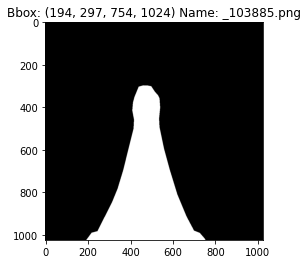

In [95]:
if not os.path.exists(masks_gan_binarized):
    binarize(masks_gan, 10, 11)
else: 
    print(f'Path: {masks_gan_binarized} binarized syntetic polygon masks already exists')

## 4. Syntetic Image Masks
### 4.1 Prepare Data: Create Folder with binary images

#### Operation for reading png segmentation masks from folder path, resize, convert to greyscale and save imagesin new folder

In [96]:
masks_syn = path_Masks_1024
masks_syn_binarized = masks_syn+'_binarized'
print(masks_syn)
print(masks_syn_binarized)

/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/ImageSize/Getriebeflansch/SegmentationMasks_1024
/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/ImageSize/Getriebeflansch/SegmentationMasks_1024_binarized


In [97]:
if not os.path.exists(masks_syn_binarized):
    binarize(masks_syn, 10, 18)
else:
    print(f'Binarized syntetic polygon masks already exists:\n{masks_syn_binarized}')

Binarized syntetic polygon masks already exists:
/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/ImageSize/Getriebeflansch/SegmentationMasks_1024_binarized


Since True is regarded as 1 and False is regarded as 0, when multiplied by 255 which is the Max value of uint8, True becomes 255 (white) and False becomes 0 (black)

In [98]:
def fill_polygon(path):
    masks_binarized = path
    masks_binarized_filled = masks_binarized+'_convex'
    os.mkdir(masks_binarized_filled)
    path_bin = os.path.join(masks_binarized, '*.png')
    files = list(glob.glob(path_bin))
    files.sort(reverse=True)
    
    for file in files:
        image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

        #print(image.shape, image.dtype)
        contour,hierarchy = cv2.findContours(image,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

        for cnt in contour:
            cv2.drawContours(image,[cnt],0,255,-1)

            #image = cv2.bitwise_not(image)
            image.dtype
            plt.imshow(image)
            #bbox = image.getbbox()
            plt.title(f'Bbox: {bbox} Name: {file[-18:]}')
            cv2.imwrite(os.path.join(masks_binarized_filled,file[-18:]),image)

In [99]:
masks_syn_binarized = path_Masks_1024+'_binarized'
masks_syn_binarized_filled = masks_syn_binarized+'_convex'
print(masks_syn_binarized_filled)

/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/ImageSize/Getriebeflansch/SegmentationMasks_1024_binarized_convex


In [100]:
if not os.path.exists(masks_syn_binarized_filled):
    fill_polygon(masks_syn_binarized)
else: 
    print(f'Filled binarized syntetic polygon masks already exists:\n{masks_syn_binarized_filled}')

Filled binarized syntetic polygon masks already exists:
/mnt/robolab/data/Bilddaten/GAN_train_data_sydavis-ai/Evaluation/ImageSize/Getriebeflansch/SegmentationMasks_1024_binarized_convex


## 6. Calculate mean IoU
Translate image mask to white RGB(255,255,255), fill convex hull, and compare masks to calculate 'Feature Consistency Score' 

In [101]:
def calculatescore(ground_truth, prediction_gan):
    """
    Compute feature consitency score of two segmentation masks.
    
    IoU(A,B) = |A & B| / (| A U B|)
    Dice(A,B) = 2*|A & B| / (|A| + |B|)

    Args:
        y_true: true masks, one-hot encoded.
        y_pred: predicted masks, either softmax outputs, or one-hot encoded.
        metric_name: metric to be computed, either 'iou' or 'dice'.
        metric_type: one of 'standard' (default), 'soft', 'naive'.
          In the standard version, y_pred is one-hot encoded and the mean
          is taken only over classes that are present (in y_true or y_pred).
          The 'soft' version of the metrics are computed without one-hot
          encoding y_pred.
          
    Returns:
        IoU of ground truth and GAN transformed syntetic Image, as a float.

    Inputs are B*W*H*N tensors, with
        B = batch size,
        W = width,
        H = height,
        N = number of classes
    """
    
    # check image shape to be the same
    assert ground_truth.shape == prediction_gan.shape, 'Input masks should be same shape, instead are {}, {}'.format(ground_truth.shape, prediction_gan.shape)
    #print('Ground truth shape: '+str(ground_truth.shape))
    #print('Predicted GAN image shape: '+str(prediction_gan.shape))
    
    intersection = np.logical_and(ground_truth, prediction_gan)
    union = np.logical_or(ground_truth, prediction_gan)
    mask_sum = np.sum(np.abs(union)) + np.sum(np.abs(intersection))
    iou_score = np.sum(intersection) / np.sum(union)
    dice_score = 2*np.sum(intersection) / np.sum(mask_sum) 
    print('IoU is: '+str(iou_score))
    print('Dice/F1 Score is: '+str(dice_score))
    return iou_score, dice_score

In [102]:
path_syn = masks_syn_binarized_filled
path_gan = masks_gan_binarized
path_syn = os.path.join(path_syn, '*.png')
path_gan = os.path.join(path_gan, '*.png')
files_syn = list(glob.glob(path_syn))
files_gan = list(glob.glob(path_gan))
files_syn.sort(reverse=True)
files_gan.sort(reverse=True)

combined_list = zip(files_syn, files_gan)
z = list(combined_list)

In [103]:
iou_list = []
dice_list = []
for syn, gan in zip(files_syn, files_gan):
    img_syn = np.array(Image.open(syn))
    img_gan = np.array(Image.open(gan))
    print(f'Image name: {syn[-10:]}')
    iou, dice = calculatescore(img_syn, img_gan)
    print('\n')
    iou_list.append(iou)
    dice_list.append(dice)
    
mean_iou = np.mean(iou_list)
mean_dice = np.mean(dice_list)
print(f'Mean IoU is: {mean_iou}')
print(f'{iou_list}\n')
print(f'Mean Dice score is: {mean_dice}')
print(dice_list)

Image name: 153324.png
IoU is: 0.9761901288242417
Dice/F1 Score is: 0.9879516293354201


Image name: 153292.png
IoU is: 0.9361744615920286
Dice/F1 Score is: 0.9670352338210831


Image name: 153226.png
IoU is: 0.9411986022198027
Dice/F1 Score is: 0.9697087161957789


Image name: 153161.png
IoU is: 0.9531794434704269
Dice/F1 Score is: 0.9760285432625782


Image name: 153061.png
IoU is: 0.9477169106696909
Dice/F1 Score is: 0.9731567308144733


Image name: 153029.png
IoU is: 0.9619205623717187
Dice/F1 Score is: 0.9805907342230779


Image name: 152930.png
IoU is: 0.9550261319002038
Dice/F1 Score is: 0.976995771378215


Image name: 152802.png
IoU is: 0.9364889242701996
Dice/F1 Score is: 0.9672029749647364


Image name: 152550.png
IoU is: 0.9596613358419567
Dice/F1 Score is: 0.9794154921463958


Image name: 152355.png
IoU is: 0.949504651473668
Dice/F1 Score is: 0.9740983698150392


Image name: 152322.png
IoU is: 0.9761422098742499
Dice/F1 Score is: 0.9879270884420468


Image name: 152286.png


In [106]:
import sys
base_dir = input_dir
prefix = 'batch'+str(batch_size)
score_name = prefix+'_score.txt'
path = os.path.join(base_dir,score_name)

if not os.path.exists(path):
    try:
        os.mknod(path)
    except FileExistsError:
        print('Folder already exists')
        pass 

original_stdout = sys.stdout             # Save a reference to the original standard output

with open(path, 'w') as f:
    sys.stdout = f                       # Change the standard output to the file we created.
    iou_list = []
    dice_list = []
    print(f'Consistency Metrics for {prefix}:\n')
    for syn, gan in zip(files_syn, files_gan):
        img_syn = np.array(Image.open(syn))
        img_gan = np.array(Image.open(gan))
        print(f'Image name: {syn[-10:]}')
        iou, dice = calculatescore(img_syn, img_gan)
        print('\n')
        iou_list.append(iou)
        dice_list.append(dice)

    mean_iou = np.mean(iou_list)
    mean_dice = np.mean(dice_list)
    print(f'Mean IoU is: {mean_iou}')
    print(f'{iou_list}\n')
    print(f'Mean Dice score is: {mean_dice}')
    print(dice_list)
    sys.stdout = original_stdout         # Reset the standard output to its original value
f.close()

In [43]:
#overlapping of 2 masks
#Image.blend()


In [118]:
import pandas as pd
cygan = '/home/molu1019/workspace/CycleGAN-Tensorflow-2'
df1 = pd.read_excel(
     os.path.join(cygan, "BatchSize_Correlation.xlsx"),
     engine='openpyxl',
)
print(df1)

   Batch Size          Ansicht     FID     IOU    Training
0     Batch 1       Blattfeder  104.59  0.8519  individual
1     Batch 1       Blattfeder   96.79  0.8717       joint
2     Batch 2       Blattfeder   93.50  0.8987  individual
3     Batch 2       Blattfeder   94.35  0.8845       joint
4     Batch 4       Blattfeder   98.77  0.8871  individual
5     Batch 4       Blattfeder  122.57  0.9627       joint
6     Batch 1  Getriebeflansch  104.75  0.9075  individual
7     Batch 1  Getriebeflansch   72.10  0.8059       joint
8     Batch 2  Getriebeflansch  156.75  0.9075  individual
9     Batch 2  Getriebeflansch  102.81  0.9616       joint
10    Batch 4  Getriebeflansch  128.17  0.9075  individual
11    Batch 4  Getriebeflansch  113.64  0.9657       joint
12    Batch 1       Entluefter  146.72  0.9755  individual
13    Batch 1       Entluefter  144.21  0.9462       joint
14    Batch 2       Entluefter  121.25  0.9768  individual
15    Batch 2       Entluefter  154.57  0.9566       joi

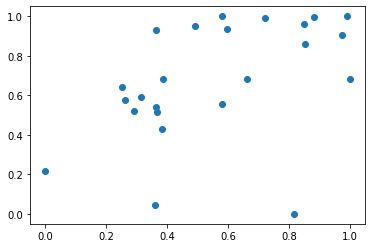

In [141]:
s1 = df1['FID']
s2 = df1['IOU']

# Normalising Data between 0 and 1
s1 = (s1 - np.min(s1)) / (np.max(s1) - np.min(s1))
s2 = (s2 - np.min(s2)) / (np.max(s2) - np.min(s2))
s1.corr(s2, method='pearson')
plt.scatter(s1, s2)
plt.show()

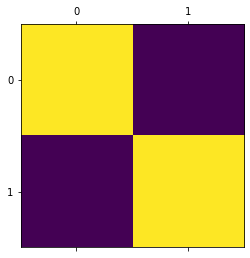

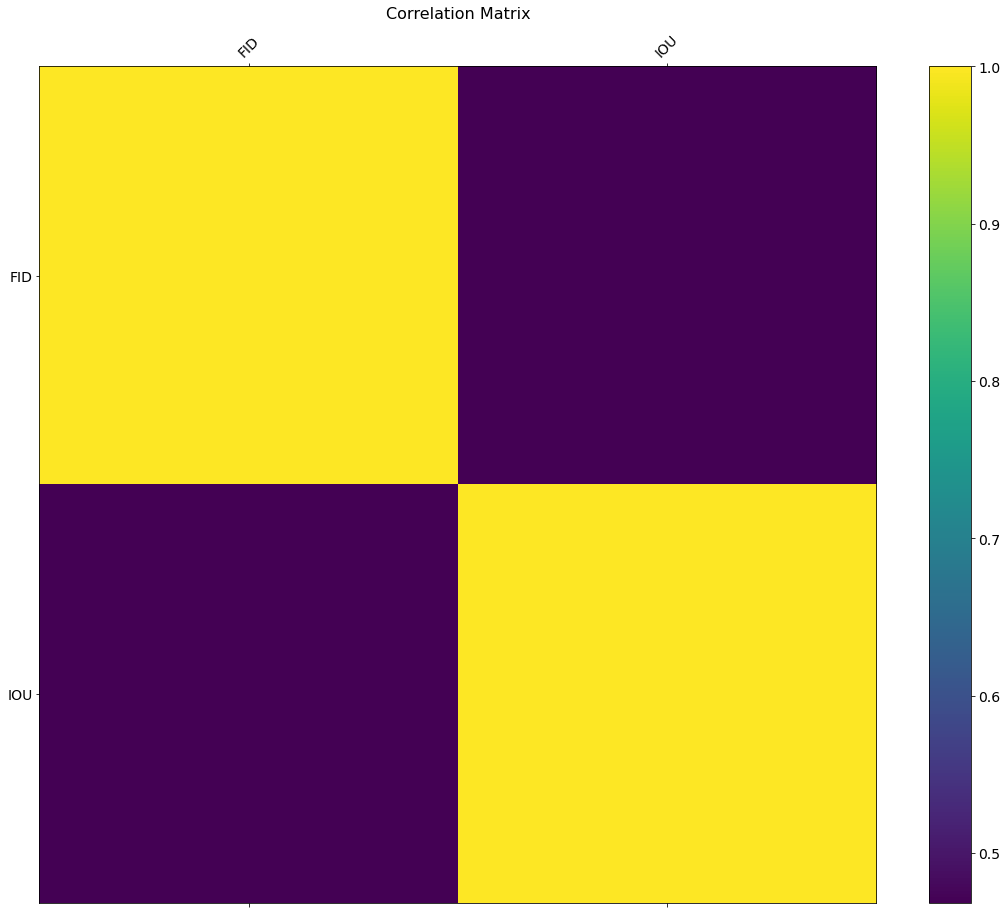

In [132]:
import matplotlib.pyplot as plt

plt.matshow(df1.corr())
plt.show()
f = plt.figure(figsize=(19, 15))
plt.matshow(df1.corr(), fignum=f.number)
plt.xticks(range(df1.select_dtypes(['number']).shape[1]), df1.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df1.select_dtypes(['number']).shape[1]), df1.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [145]:
'''{admonition} Click the button to reveal!
:class: dropdown
Some hidden toggle content!

![](../images/cool.jpg)
'''

'{admonition} Click the button to reveal!\n:class: dropdown\nSome hidden toggle content!\n\n![](../images/cool.jpg)\n'